In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

n = 12
N = 52
K = 13

def p(k):
    return (comb(K,k) * comb(N-K,n-k)) / comb(N,n)

<BarContainer object of 13 artists>

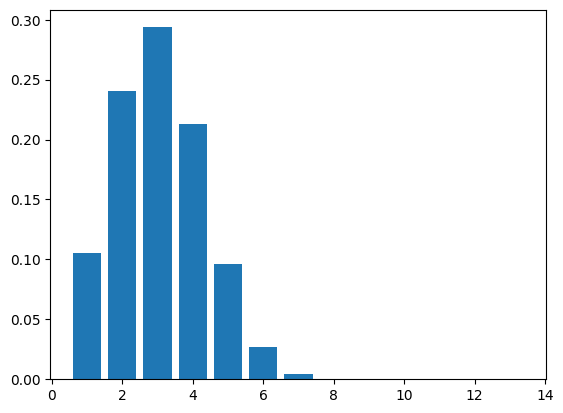

In [2]:
k = np.arange(1, 14)

p_values = np.zeros(len(k))
for i in range(len(k)):
    p_values[i] = p(k[i])
    # if i>0:
    #     p_values[i] += p_values[i-1]

plt.bar(k, p_values)

In [3]:
import random


def sample_hypergeometric(num_samples=1):
    probabilities = [p(k) for k in range(max(0, n - (N - K)), min(K, n) + 1)]
    cumulative_probabilities = np.cumsum(probabilities)
    cumulative_probabilities /= cumulative_probabilities[-1]

    samples = []
    for _ in range(num_samples):
        rand = random.random()
        for k, cum_prob in enumerate(cumulative_probabilities):
            if rand <= cum_prob:
                samples.append(k)
                break

    return samples



In [4]:
samples = sample_hypergeometric(13)
print("Mean:", np.mean(samples))
print("Variance:", np.var(samples))
print('Max:', max(samples))

n_sim = 100000
samples_sim = np.zeros(n_sim)
for i in range(n_sim):
    samples_sim[i] = max(sample_hypergeometric(13))

Mean: 3.3076923076923075
Variance: 2.828402366863905
Max: 6


Text(0, 0.5, 'Density')

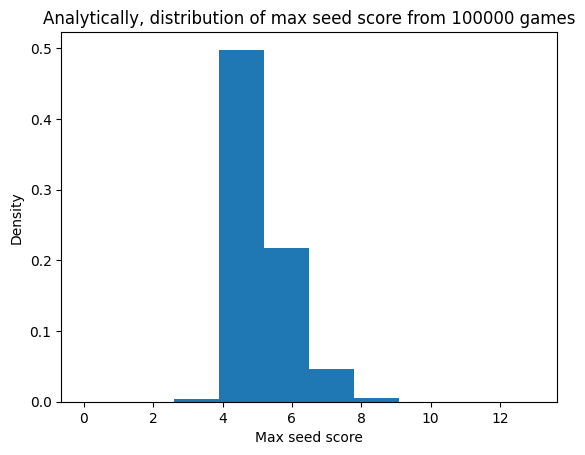

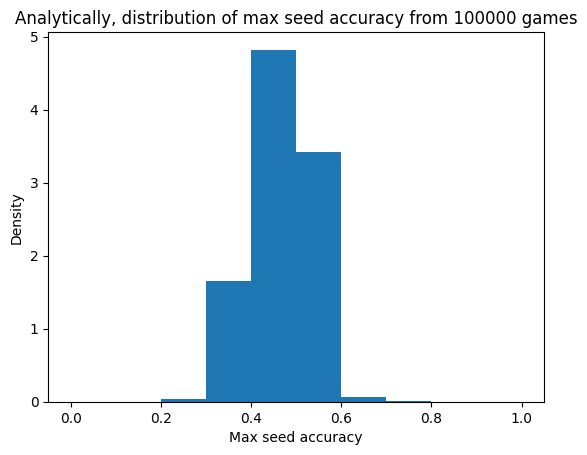

In [5]:
plt.figure()
plt.hist(samples_sim, range=(0, 13), density=True)
plt.title(f'Analytically, distribution of max seed score from {n_sim} games')
plt.xlabel('Max seed score')
plt.ylabel('Density')

plt.figure()
plt.hist(samples_sim/n, range=(0,1), density=True)
plt.title(f'Analytically, distribution of max seed accuracy from {n_sim} games')
plt.xlabel('Max seed accuracy')
plt.ylabel('Density')